# 자연어처리 과제 2 (5주차)
* 과제는 해당 .ipynb 파일에 코드 작성
    * 코드는 google colab의 gpu를 사용하는 런타임 환경에서 모두실행을 통해 한번에 실행 되어야함
    * 생성형 AI (ChatGPT, Copilot, Claude, ...) 등 사용 가능
        * 단, 사용시 사용한 방법, 입력, 출력을 캡처해 보고서에 기입
* Word를 통해 자유형식으로 보고서를 작성
    * 보고서의 양식은 자유
    * 보고서의 제출은 .pdf 형식으로 제출해야하며, 파일명은 "학번_이름_HW_??.pdf"로 제출 할 것
    * 보고서에 코드를 그대로 복붙 하지 말 것 (캡처 도구를 활용, 환경 설치 자료 참고)
* .ipynb와 .pdf 파일을 el을 통해 제출
    * 예시 : "2232036006_임상훈_HW_01.ipynb"와 "2232036006_임상훈_HW_01.pdf"를 제출

#### 데이터 로드하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 임포트
!pip install lightning wandb nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
!tar -xzvf aclImdb_v1.tar.gz

tar (child): aclImdb_v1.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
from pathlib import Path

train_datas = []
test_datas = []

train_data_dir = Path("/content/aclImdb/train")
test_data_dir = Path("/content/aclImdb/test")

for sentiment in ["pos", "neg"]:
    samples = list(train_data_dir.glob(f"{sentiment}/*.txt"))
    train_datas.extend(samples[:len(samples)])

for sentiment in ["pos", "neg"]:
    samples = list(test_data_dir.glob(f"{sentiment}/*.txt"))
    test_datas.extend(samples[:len(samples)])

train_file = open("train.txt", "w")
test_file = open("test.txt", "w")

# dataset 그룹화 진행
for file, datas in [(train_file, train_datas), (test_file, test_datas)]:
    file.write("id\ttext\tlabel\n")
    for data in datas:
        lines = [line.strip() for line in data.open().readlines()]
        text = " ".join(lines)
        id = data.name[:-4]
        label = 1 if "pos" in data.parts else 0
        file.write(f"{id}\t{text}\t{label}\n")

train_file.close()
test_file.close()

In [3]:
# data 읽어오기
from requests import get
from os.path import exists

# 파일이 있으면 파일을 읽어온다.
def download(url, filename):
    if exists(filename): # file
        print(f"{filename} already exists")
    else:
        with open(filename, "wb") as file:
            response = get(url) # url
            file.write(response.content)

# 가져온 dataset 읽기
with open("train.txt", "r") as file:
    for i in range(5):
        print(file.readline())

# with open("test.txt", "r") as file:
#     for i in range(5):
#         print(file.readline())

with open("train.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    train_data = [line.split("\t") for line in lines if len(line) > 0]

with open("test.txt", "r", encoding="utf-8") as file:
    contents = file.read()
    lines = contents.split("\n")[1:]
    test_data = [line.split("\t") for line in lines if len(line) > 0]

id	text	label

11177_8	*****Spoilers herein*****<br /><br />What really scares you? Killer sharks, or maybe ghosts trying to bring back a message? Maybe a chainsaw wielding psychopath?<br /><br />Maybe. But those fears don't even compare to a horror which people dare not even speak of or consider--and that is the death of one's own child. "Pet Sematary" taps this base, primal adult fear, and then takes it to places that most could not bear to explore.<br /><br />I've read comments about this film that include poor acting, characters making stupid decisions, etc. I disagree. The acting is actually first rate for a film like this. Maybe it is impossible for many to imagine the desperation resulting from such a scenario. But the film's events are not only logical, they may be absolutely inevitable if such a scenario were possible. This is the true horror of "Pet Sematary": It isn't that pets and people come back from the dead as evil killers who hunt with knives and scalpels, it is that a

## 1. IMDB 데이터 처리 (20점)

* Stanford 대학에서 제공하는 IMDB 영화 리뷰 데이터(https://ai.stanford.edu/~amaas/data/sentiment/)를 다운 받아 학습, 테스트 데이터를 구성하시오

    * 데이터는 영어 텍스트 데이터로 긍정/부정의 Binary classification 데이터셋임
    * 데이터셋의 압축을 해제했을 떄의 각 디렉토리의 용도는 다음과 같음
        * train/pos : 긍정 label의 학습 데이터
        * train/neg : 부정 label의 학습 데이터
        * test/pos : 긍정 label의 테스트 데이터
        * test/neg : 부정 label의 테스트 데이터
    * 지금껏 배운 다양한 기법을 적용해 tokenizing, nomalizing 등을 진행한 후 vocab을 구축하여야함

**GRADING**
* 데이터셋 전처리를 통해 vocab 구축 (+20)

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

english_stops = set(stopwords.words('english'))
english_stops.add("br")  # "br"을 불용어 목록에 추가
stemmer = PorterStemmer()

In [7]:
tokenized_train_dataset = []
tokenized_test_dataset = []

import re

for data in train_data:
    try :
      text = re.sub(r'[,.!?;:()\"\'/<>\d-]', ' ', data[1]) #특수문자 제거
      text = text.lower()  # 소문자 변환
      tokens = word_tokenize(text) #nltk tokenizer 적용
      # stem_tokens = [stemmer.stem(token) for token in tokens] #PorterStemmer 적용
      stop_tokens = [token for token in tokens if token not in english_stops] # 불용어 제거
      labels = int(data[2])
      tokenized_train_dataset.append((stop_tokens, labels))
    # Dataset을 불러올 때 valueerror가 계속 나타나서 label을 데이터 정제할 때 int형으로 변환함
    except ValueError:
      pass

for data in test_data:
    try :
      text = re.sub(r'[,.!?;:()\"\'/<>\d-]', ' ', data[1])
      text = text.lower()
      tokens = word_tokenize(text)
      # stem_tokens = [stemmer.stem(token) for token in tokens]
      stop_tokens = [token for token in tokens if token not in english_stops]
      labels = int(data[2])
      tokenized_test_dataset.append((stop_tokens, labels))
    # Dataset을 불러올 때 valueerror가 계속 나타나서 label을 데이터 정제할 때 int형으로 변환함
    except ValueError:
      pass

In [8]:
from collections import Counter

token_counter = Counter()

for tokens, _ in tokenized_train_dataset:
    token_counter.update(tokens)

# remove tokens that appear only twice or less
min_count = 2
cleaned_vocab = {"[PAD]":0, "[UNK]":1}
cleaned_vocab_idx = 2

for token, count in token_counter.items():
    if count > min_count:
        cleaned_vocab[token] = cleaned_vocab_idx
        cleaned_vocab_idx += 1

In [9]:
test_counter = Counter()

for tokens, _ in tokenized_test_dataset:
    test_counter.update(tokens)

test_vocab = {"[PAD]":0, "[UNK]":1}
test_vocab_idx = 2

for token, count in test_counter.items():
      test_vocab[token] = test_vocab_idx
      test_vocab_idx += 1

## 2. 데이터셋 통계 분석 (30점)
* 1에서 처리한 vocab을 통해 tokenizing 된 데이터셋의 여러 통계를 계산하시오
    * 통계의 예시
        * 학습/테스트 문서의 수
        * 학습/테스트 데이터의 평균 token 수
        * 데이터의 token histogram
        * 학습/테스트에서의 unk token의 수
        * 각 token의 빈도 그래프
        * 긍정/부정의 token 빈도 차이
        * 긍정/부정의 frequent/rare token

* 이전 실습까지 사용한 코드 및 검색을 활용하여 최소 1개의 그래프를 그려야 함

**GRADING**
* 분석한 통계의 수 (+5)

In [10]:
# 1번. 학습/테스트 문서의 수
print("Train Dataset의 문서의 수 : ", len(train_data))
print("Test Dataset의 문서의 수 : ", len(test_data))

Train Dataset의 문서의 수 :  25000
Test Dataset의 문서의 수 :  25000


In [11]:
# 2번. 학습/테스트 데이터의 평균 token 수
train_token_counts = [len(tokens) for tokens, label in tokenized_train_dataset]
train_avg_token_count = sum(train_token_counts) / len(tokenized_train_dataset)
print(f"Train Dataset의 평균 토큰 수: {train_avg_token_count}")

test_token_counts = [len(tokens) for tokens, label in tokenized_test_dataset]
test_avg_token_count = sum(test_token_counts) / len(tokenized_train_dataset)
print(f"Test Dataset의 평균 토큰 수: {test_avg_token_count}")

Train Dataset의 평균 토큰 수: 120.02281094925564
Test Dataset의 평균 토큰 수: 117.20918040659517


In [12]:
# 3번. 학습/테스트에서의 unk token의 수
total_token_count = 0
unk_count = 0

for tokens, _ in tokenized_test_dataset:
    total_token_count += len(tokens)
    for token in tokens:
        if token not in cleaned_vocab:
            unk_count += 1

print("Total Tokens In Test:", total_token_count)
print("Number of [UNK] tokens In Test:", unk_count)

Total Tokens In Test: 2928823
Number of [UNK] tokens In Test: 89166


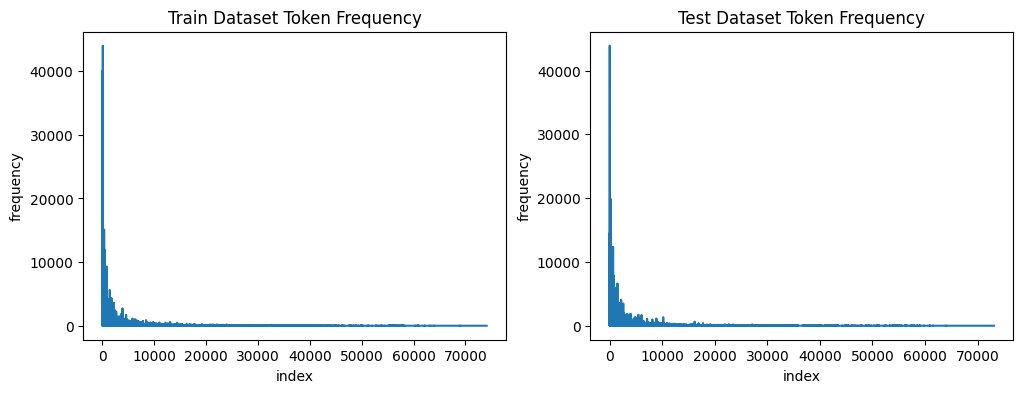

In [13]:
# 4번. 각 토큰의 빈도 수
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))

plt.subplot(1, 2, 1)
plt.plot(token_counter.values())
plt.title('Train Dataset Token Frequency')
plt.xlabel("index")
plt.ylabel("frequency")
print()

plt.subplot(1, 2, 2)
plt.plot(test_counter.values())
plt.title('Test Dataset Token Frequency')
plt.xlabel("index")
plt.ylabel("frequency")
plt.show()

In [14]:
# Train data에서 10개 토큰과 그 빈도 수 출력
print("Train Dataset의 처음 10개 토큰과 빈도 수:")
for token, freq in list(token_counter.items())[:10]:
    print(f"{token}: {freq}")

print("\nTest Dataset의 처음 10개 토큰과 빈도 수:")
# Test data에서 처음 10개 토큰과 그 빈도 수 출력
for token, freq in list(test_counter.items())[:10]:
    print(f"{token}: {freq}")

Train Dataset의 처음 10개 토큰과 빈도 수:
*: 7047
spoilers: 580
herein: 26
really: 11731
scares: 189
killer: 1456
sharks: 42
maybe: 2339
ghosts: 181
trying: 2472

Test Dataset의 처음 10개 토큰과 빈도 수:
okay: 804
ghoulies: 101
kind: 2763
bad: 9160
really: 11345
even: 12192
acting: 6367
storyline: 759
stupid: 1829
forget: 738


In [15]:
# 5번. Train/Test Data에서 긍정/부정의 token 빈도 차이

## train
positive_train = 0
negative_train = 0
positive_tokens_train = []
negative_tokens_train = []

for tokens, label in tokenized_train_dataset:
    # 긍정
    if label == 1:
        positive_tokens_train.extend(tokens)
        positive_train += 1
    # 부정
    else:
        negative_tokens_train.extend(tokens)
        negative_train += 1

print("긍정 문서 개수 (Train) : ", positive_train)
print("부정 문서 개수 (Train)  : ", negative_train)

positive_tokens_set_train = set(positive_tokens_train)
negative_tokens_set_train  = set(negative_tokens_train)

print("긍정 Token의 개수 (Train) : ", len(positive_tokens_set_train))
print("부정 Token의 개수 (Train) : ", len(negative_tokens_set_train))

## test
positive_test = 0
negative_test = 0
positive_tokens_test = []
negative_tokens_test = []

for tokens, label in tokenized_test_dataset:
    # 긍정
    if label == 1:
        positive_tokens_test.extend(tokens)
        positive_test += 1
    # 부정
    else:
        negative_tokens_test.extend(tokens)
        negative_test += 1

print("긍정 문서 개수 (Test) : ", positive_test)
print("부정 문서 개수 (Test)  : ", negative_test)

positive_tokens_set_test = set(positive_tokens_test)
negative_tokens_set_test  = set(negative_tokens_test)

print("긍정 Token의 개수 (Test) : ", len(positive_tokens_set_test))
print("부정 Token의 개수 (Test) : ", len(negative_tokens_set_test))

긍정 문서 개수 (Train) :  12492
부정 문서 개수 (Train)  :  12496
긍정 Token의 개수 (Train) :  55200
부정 Token의 개수 (Train) :  53510
긍정 문서 개수 (Test) :  12493
부정 문서 개수 (Test)  :  12492
긍정 Token의 개수 (Test) :  54054
부정 Token의 개수 (Test) :  52797


## 3. Classification 모델 구축 및 학습 (50점)
* 이론 및 실습 수업을 통해 배운 MLP, CNN, RNN을 사용하여 각자의 모델을 구축하시오
    * 모델의 크기는 ModelSummary 기준 500MB의 메모리를 초과하면 안됨
    * 모델은 최대 10 epoch 학습 할 수 있음 (적게 학습하는 것은 ok)

* 최대한 높은 성능을 기록하는 모델을 구축하여야 함
    * 학습엔 주어진 학습 데이터만을 사용하여야 함
    * 테스트 데이터를 학습에 사용하면 0점
* 모델 구성에 있어 왜 자신이 그런 모델 구조를 설계 하였는지 설명을 하여야함

**GRADING**
* 모델 구축 및 학습 (+20)
* 모델에 대한 설명 (+10)
* 모델 성능에 따른 성적
    * 상위 0~30% :  +20
    * 상위 30~50% :  +15
    * 상위 50~70% :  +10
    * 상위 70~100% : +5

In [16]:
import os
import torch
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

#### Word2Vec 및 Skip-Gram 설정

In [17]:
# make word2vec train data
word2vec_train_datas = []
for train_text, _ in tokenized_train_dataset:
    word2vec_train_datas.append([word for word in train_text])

In [18]:
from gensim.models import Word2Vec

# call CBOW or SkipGram
SkipGram_W2V = Word2Vec(sentences = word2vec_train_datas, vector_size = 300,
                        window = 10, min_count = 1, workers = 4, sg = 1)

In [19]:
import numpy as np

# make embedding lookup matrix
embedding_list = []

for token, idx in cleaned_vocab.items():
    if token in SkipGram_W2V.wv:
        embedding_list.append(SkipGram_W2V.wv[token])
    elif token == "[PAD]":
        embedding_list.append(np.zeros(SkipGram_W2V.wv.vectors.shape[1]))
    elif token == "[UNK]":
        embedding_list.append(np.random.uniform(-1, 1, SkipGram_W2V.wv.vectors.shape[1]))
    else:
        embedding_list.append(np.random.uniform(-1, 1, SkipGram_W2V.wv.vectors.shape[1]))

embedding_loopup_matrix = np.vstack(embedding_list)

print(embedding_loopup_matrix.shape)
print(len(cleaned_vocab))

(37300, 300)
37300


In [20]:
from torch.utils.data import Dataset, DataLoader

# Tokeninizing된 Data를 Input으로 받는다.
class SentimentDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    # TOkeninizing된 Data
    # 수행 과정: 하나의 text data에 대해서 vocabulary에 있는 인덱스를 mapping한다.
    # mapping 할 때, 시퀀스 길이를 초과하면 truncating 수행
    # 반대면 padding 작업 수행
    def __getitem__(self, index):
        label = self.data[index][1] #현재 인덱스에 해당하는 데이터 샘플 정답
        tokens = self.data[index][0] #token화된 text data

        # vocab에 token이 있으면 ID를 반환하고 아니면 1을 반환한다.
        # 1은 대부분 [UNK] 특수 토큰의 ID를 가리킨다.
        token_ids = [self.vocab[token] if token in self.vocab else 1 for token in tokens]

        # Padding 수행 (token 시퀀스 길이 맞추기)
        # text 평균 길이 확인해보기 :
        if len(token_ids) > 120:
            token_ids = token_ids[:120]
        # sequence 길이가 100이 안되면 0으로 padding 추가
        else:
            token_ids = token_ids[:120] + [0] * (120 - len(token_ids))

        return torch.tensor(token_ids), torch.tensor(label)

In [21]:
import lightning as pl

class SentimentClassifierPL(pl.LightningModule):
    def __init__(self, sentiment_classifier):
        super(SentimentClassifierPL, self).__init__()
        self.model = sentiment_classifier
        self.loss = nn.CrossEntropyLoss()

        self.validation_step_outputs = []
        self.test_step_outputs = []
        self.save_hyperparameters()

    def training_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("train_loss", loss)
        return loss

    def test_step(self, batch, batch_idx):
        inputs, labels = batch
        outputs = self.model(inputs)
        loss = self.loss(outputs, labels)
        self.log("test_loss", loss)
        self.test_step_outputs.append((loss, outputs, labels))
        return loss, outputs, labels

    def on_test_epoch_end(self):
        outputs = self.test_step_outputs
        avg_loss = torch.stack([x[0] for x in outputs]).mean()
        self.log("avg_test_loss", avg_loss)

        all_outputs = torch.cat([x[1] for x in outputs])
        all_labels = torch.cat([x[2] for x in outputs])
        all_preds = all_outputs.argmax(dim=1)
        accuracy = (all_preds == all_labels).float().mean()
        self.log("test_accuracy", accuracy)
        self.test_step_outputs.clear()

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=1e-3)
        return optimizer

In [22]:
import wandb
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import ModelSummary

wandb.login()

def check_vocab_properties(vocab):
    print(f"Vocab size: {len(vocab)}")
    print(f"Vocab items: {list(vocab.items())[:5]}")


def check_performance(model, vocab,train_data, test_data, wandb_log_name):
    wandb_logger = WandbLogger(project="NLP_Assignment02", name=wandb_log_name, group="word2vec")

    pl_model = SentimentClassifierPL(model)

    train_dataset = SentimentDataset(train_data, vocab)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
    test_dataset = SentimentDataset(test_data, vocab)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

    trainer = pl.Trainer(
        max_epochs= 7, # 3, 5, 7, 10번 실행
        accelerator="gpu",
        logger=wandb_logger,
        callbacks=[ModelSummary(max_depth=2)]
    )

    trainer.fit(
        model=pl_model,
        train_dataloaders=train_loader,
        # val_dataloaders=val_loader
    )

    trainer.test(dataloaders=test_loader)

    wandb.finish()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


#### 1번. MLP

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, vocab_size):
        super(MLP, self).__init__()
        # lookup matrix의 가중치 학습 X
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix),
                                                      freeze=False)
        self.fc1 = nn.Linear(300 * 120, 120)
        self.fc3 = nn.Linear(120, 2)

    # 원하는 연산을 수행하기 위해서 차원을 찍어본 뒤에 올바르게 설정해야 한다.
    def forward(self, x):
        x = self.embedding(x)
        x = x.view(-1, 300 * 120)
        x = F.relu(self.fc1(x)) # fully-connected-Layer 설정
        x = self.fc3(x)
        return x

In [24]:
mlp_model = MLP(len(cleaned_vocab))

In [25]:
check_performance(mlp_model, cleaned_vocab, tokenized_train_dataset, tokenized_test_dataset, "mlp")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer 

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name            | Type             | Params
-----------------------------------------------------
0 | model           | MLP              | 15.5 M
1 | model.embedding | Embedding        | 11.2 M
2 | model.fc1       | Linear           | 4.3 M 
3 | model.fc3       | Linear           | 242   
4 | loss            | CrossEntropyLoss | 0     
-----------------------------------------------------
15.5 M    Trainable params
0         Non-trainable params
15.5 M    Total params
62.041    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name            | Type             | Params
-----------------------------------------------------
0 | model           | MLP              | 15.5 M
1 | model.embedding | Embedding        | 11.2 M
2 | model.fc1       | Linear           | 4.3 M 
3 | model.fc3       | Linear           | 2

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=7` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:145: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
INFO: Restoring states from the checkpoint path at ./NLP_Assignment02/fzpjpuj0/checkpoints/epoch=6-step=2737.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Assignment02/fzpjpuj0/checkpoints/epoch=6-step=2737.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at ./NLP_Assignment02/fzpjpuj0/chec

Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.7466390132904053     │
│       test_accuracy       │    0.8456673622131348     │
│         test_loss         │    0.7463622689247131     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
test_accuracy,▁
test_loss,▁
train_loss,██▆▅▄▅▃▂▃▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
avg_test_loss,0.74664
epoch,7
test_accuracy,0.84567
test_loss,0.74636
train_loss,3e-05


#### 2번. CNN

In [26]:
# 1. Embedding이 2개이다.
# 2. 합성곱층의 Filter가 다 다르다.
# 3. 시간축을 기준으로 max-pooling을 수행한다.
class TextCNN(nn.Module):
    def __init__(self, vocab_size):
        super(TextCNN, self).__init__()
        self.SG_embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix),
                                                         freeze=True) # skip-gram
        self.RD_embedding = nn.Embedding(vocab_size, 300) # random embedding

        # skip-gram filter를 3개 선언
        # input channel 1개
        # 32개의 filter 사용
        # 3x3, 4x4, 5x5 filter 사용
        self.SG_conv1 = nn.Conv2d(1, 300, (3, 300))
        self.SG_conv2 = nn.Conv2d(1, 300, (4, 300))
        self.SG_conv3 = nn.Conv2d(1, 300, (5, 300))

        # random filter를 3개 선언
        self.RD_conv1 = nn.Conv2d(1, 300, (3, 300))
        self.RD_conv2 = nn.Conv2d(1, 300, (4, 300))
        self.RD_conv3 = nn.Conv2d(1, 300, (5, 300))

        self.fc = nn.Linear(6*300, 2)


    def forward(self, x):
        SG_embedding = self.SG_embedding(x).unsqueeze(1)
        RD_embedding = self.RD_embedding(x).unsqueeze(1)

        SG_conv1_feature = F.relu(self.SG_conv1(SG_embedding).squeeze(3))
        SG_conv2_feature = F.relu(self.SG_conv2(SG_embedding).squeeze(3))
        SG_conv3_feature = F.relu(self.SG_conv3(SG_embedding).squeeze(3))

        RD_conv1_feature = F.relu(self.RD_conv1(RD_embedding).squeeze(3))
        RD_conv2_feature = F.relu(self.RD_conv2(RD_embedding).squeeze(3))
        RD_conv3_feature = F.relu(self.RD_conv3(RD_embedding).squeeze(3))

        # 시간축 → token의 수
        # 정해진 filter 개수만큼 가져온다.
        SG_max1 = F.max_pool1d(SG_conv1_feature, SG_conv1_feature.size(2)).squeeze(2)
        SG_max2 = F.max_pool1d(SG_conv2_feature, SG_conv2_feature.size(2)).squeeze(2)
        SG_max3 = F.max_pool1d(SG_conv3_feature, SG_conv3_feature.size(2)).squeeze(2)

        RD_max1 = F.max_pool1d(RD_conv1_feature, RD_conv1_feature.size(2)).squeeze(2)
        RD_max2 = F.max_pool1d(RD_conv2_feature, RD_conv2_feature.size(2)).squeeze(2)
        RD_max3 = F.max_pool1d(RD_conv3_feature, RD_conv3_feature.size(2)).squeeze(2)

        x = torch.cat([SG_max1, SG_max2, SG_max3, RD_max1, RD_max2, RD_max3], dim=1)

        x = self.fc(x)

        return x

In [27]:
textcnn_model = TextCNN(len(cleaned_vocab))

In [28]:
check_performance(textcnn_model, cleaned_vocab, tokenized_train_dataset,
                  tokenized_test_dataset, "textcnn")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'sentiment_classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sentiment_classifier'])`.
INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:l

INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
   | Name               | Type             | Params
---------------------------------------------------------
0  | model              | TextCNN          | 24.5 M
1  | model.SG_embedding | Embedding        | 11.2 M
2  | model.RD_embedding | Embedding        | 11.2 M
3  | model.SG_conv1     | Conv2d           | 270 K 
4  | model.SG_conv2     | Conv2d           | 360 K 
5  | model.SG_conv3     | Conv2d           | 450 K 
6  | model.RD_conv1     | Conv2d           | 270 K 
7  | model.RD_conv2     | Conv2d           | 360 K 
8  | model.RD_conv3     | Conv2d           | 450 K 
9  | model.fc           | Linear           | 3.6 K 
10 | loss               | CrossEntropyLoss | 0     
---------------------------------------------------------
13.4 M    Trainable params
11.2 M    Non-trainable params
24.5 M    Total params
98.182    Total estimated model params si

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=7` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Assignment02/12p5rav5/checkpoints/epoch=6-step=2737.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Assignment02/12p5rav5/checkpoints/epoch=6-step=2737.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at ./NLP_Assignment02/12p5rav5/checkpoints/epoch=6-step=2737.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Assignment02/12p5rav5/checkpoints/epoch=6-step=2737.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    0.43273279070854187    │
│       test_accuracy       │    0.8707624077796936     │
│         test_loss         │    0.4329492151737213     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
test_accuracy,▁
test_loss,▁
train_loss,▆█▆▄▅▅▂▃▃▃▂▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
avg_test_loss,0.43273
epoch,7
test_accuracy,0.87076
test_loss,0.43295
train_loss,0.00056


#### 3번. RNN

In [29]:
class biLSTM(nn.Module):
    def __init__(self, vocab_size):
        super(biLSTM, self).__init__()
        hidden_size = 300
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(embedding_loopup_matrix),
                                                      freeze=False)
        # 양방향 수행 (이전, 이후 단어를 사용한다.) > Right, Left 둘 다 사용
        # hidden state 2개를 사용한다.
        self.rnn = nn.LSTM(300, 300, batch_first=True, num_layers=2, bidirectional=True)
        self.fc = nn.Sequential(
          nn.Linear(hidden_size * 2, hidden_size),  # 양방향이므로 hidden_size * 2
          nn.ReLU(),
          nn.Linear(hidden_size, 2)  # 최종 출력 크기는 작업에 따라 결정
        )

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = x.mean(dim=1)
        x = self.fc(x)
        return x

In [30]:
bilstm_model = biLSTM(len(cleaned_vocab))

In [31]:
check_performance(bilstm_model, cleaned_vocab, tokenized_train_dataset,
                  tokenized_test_dataset, "bilstm")

INFO: Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:lightning.pytorch.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name            | Type             | Params
-----------------------------------------------------
0 | model           | biLSTM           | 15.0 M
1 | model.embedding | Embedding        | 11.2 M
2 | model.rnn       | LSTM             | 3.6 M 
3 | model.fc        | Sequential       | 180 K 
4 | loss            | CrossEntropyLoss | 0     
-----------------------------------------------------
15.0 M    Trainable params
0         Non-trainable params
15.0 M    Total params
59.922    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name            | Type             | Params
-----------------------------------------------------
0 | model           | biLSTM           | 15.0 M
1 | model.embedding | Embedding        | 11.2 M
2 | model.rnn       | LSTM             | 3.6 M 
3 | model.fc        | Sequential       | 1

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=7` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=7` reached.
INFO: Restoring states from the checkpoint path at ./NLP_Assignment02/xy0jtzz6/checkpoints/epoch=6-step=2737.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Restoring states from the checkpoint path at ./NLP_Assignment02/xy0jtzz6/checkpoints/epoch=6-step=2737.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: Loaded model weights from the checkpoint at ./NLP_Assignment02/xy0jtzz6/checkpoints/epoch=6-step=2737.ckpt
INFO:lightning.pytorch.utilities.rank_zero:Loaded model weights from the checkpoint at ./NLP_Assignment02/xy0jtzz6/checkpoints/epoch=6-step=2737.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       avg_test_loss       │    1.3727058172225952     │
│       test_accuracy       │    0.8258554935455322     │
│         test_loss         │     1.374728798866272     │
└───────────────────────────┴───────────────────────────┘

avg_test_loss,▁
epoch,▁▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
test_accuracy,▁
test_loss,▁
train_loss,█▄▅▄▃▃▄▃▄▃▂▃▁▂▂▁▁▂▂▁▁▁▁▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
avg_test_loss,1.37271
epoch,7
test_accuracy,0.82586
test_loss,1.37473
train_loss,4e-05
